In [1]:
from pulp import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = pd.read_csv("Detection_Matrix.csv", header=None)
f.head()

,0,1,2,3,4,5,6,7,8,9,...,801,802,803,804,805,806,807,808,809,810
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,...,0,1,1,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0,0,1,...,0,1,1,0,0,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
V = [i for i in range(811)]
E = 1123

In [4]:
prob = LpProblem("NetworkMonitor", LpMinimize)

In [5]:
# Decision Variable
sv = LpVariable.dicts("s", V, 0, cat='Binary')

In [6]:
# Objective Value
prob += lpSum([sv[v] for v in V])

In [7]:
# Constraints
for e in range(E):
    prob += lpSum([f.iloc[e,v]*sv[v] for v in V]) >= 1

In [8]:
path_to_Gurobi = '/Library/gurobi1003/macos_universal2/bin/gurobi_cl'
prob.solve(GUROBI_CMD(path=path_to_Gurobi,options=[("MIPGap", 0)]))

Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2024-11-12
Using license file /Users/dipendra/gurobi.lic

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])
Copyright (c) 2023, Gurobi Optimization, LLC

Read LP format model from file /var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/7c06abf95d9149d7a4862c15e4acb3be-pulp.lp
Reading time = 0.04 seconds
OBJ: 1123 rows, 811 columns, 132982 nonzeros

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1123 rows, 811 columns and 132982 nonzeros
Model fingerprint: 0xe7f09fba
Variable types: 0 continuous, 811 integer (811 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 28.0000000
Presolve removed 1052 ro

1

In [9]:
# Check solution status
print('Solution status: {}'.format(LpStatus[prob.status]))

Solution status: Optimal


In [10]:
a_sensors = []
for v in V:
    if sv[v].varValue == 1:
        a_sensors.append(v)
        print(f'Node {v} has a sensor on it.')

Node 16 has a sensor on it.
Node 78 has a sensor on it.
Node 104 has a sensor on it.
Node 206 has a sensor on it.
Node 233 has a sensor on it.
Node 277 has a sensor on it.
Node 392 has a sensor on it.
Node 395 has a sensor on it.
Node 424 has a sensor on it.
Node 426 has a sensor on it.
Node 430 has a sensor on it.
Node 438 has a sensor on it.
Node 454 has a sensor on it.
Node 482 has a sensor on it.
Node 651 has a sensor on it.
Node 705 has a sensor on it.
Node 712 has a sensor on it.
Node 748 has a sensor on it.
Node 786 has a sensor on it.


In [11]:
print(f'Total number of sensors: {prob.objective.value()}')

Total number of sensors: 19.0


In [12]:
obj_vals = []
nodes = {}
for b in range(21):
    prob = LpProblem("NetworkMonitor", LpMaximize)
    p=0.1
    
    # Decision Variable
    sv = LpVariable.dicts("s", V, 0, cat='Binary')
    y = LpVariable.dicts("y", [e for e in range(E)], 0, cat='Binary')

    # Objective Value
    prob += lpSum([y[e]*p for e in range(E)])
    
    # Constraints
    prob += lpSum([sv[v] for v in V]) <= b
    for e in range(E):
        prob += lpSum([f.iloc[e,v]*sv[v] for v in V]) >= y[e]
    
    prob.solve(GUROBI_CMD(path=path_to_Gurobi,options=[("MIPGap", 0)]))
    
    sensors = []
    for v in V:
        if sv[v].varValue == 1:
            sensors.append(v)
    nodes[b] = sensors
    obj_vals.append(prob.objective.value()) 

Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2024-11-12
Using license file /Users/dipendra/gurobi.lic

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])
Copyright (c) 2023, Gurobi Optimization, LLC

Read LP format model from file /var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/c7ea49d3aec54b3bb7bbf9bc5267f78e-pulp.lp
Reading time = 0.04 seconds
OBJ: 1124 rows, 1934 columns, 134916 nonzeros

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1124 rows, 1934 columns and 134916 nonzeros
Model fingerprint: 0xa1b76011
Variable types: 0 continuous, 1934 integer (1934 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 112


Root relaxation: objective 8.390000e+01, 1461 iterations, 0.06 seconds (0.09 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      83.9000000   83.90000  0.00%     -    0s

Explored 1 nodes (1461 simplex iterations) in 0.18 seconds (0.42 work units)
Thread count was 8 (of 8 available processors)

Solution count 3: 83.9 13.9 -0 

Optimal solution found (tolerance 0.00e+00)
Best objective 8.390000000000e+01, best bound 8.390000000000e+01, gap 0.0000%

Wrote result file '/var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/db38635b572349daade6ec02b3173748-pulp.sol'

Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2024-11-12
Using license file /Users/dipendra/gurobi.lic

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])
Copyrigh

Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2024-11-12
Using license file /Users/dipendra/gurobi.lic

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])
Copyright (c) 2023, Gurobi Optimization, LLC

Read LP format model from file /var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/81eec1d49f5340b598d565abb74d16e5-pulp.lp
Reading time = 0.04 seconds
OBJ: 1124 rows, 1934 columns, 134916 nonzeros

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1124 rows, 1934 columns and 134916 nonzeros
Model fingerprint: 0x59baee73
Variable types: 0 continuous, 1934 integer (1934 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [9e+00, 9e+00]
Found heuristic solution: objective -0.0000000
Sparsify removed 662

Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2024-11-12
Using license file /Users/dipendra/gurobi.lic

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])
Copyright (c) 2023, Gurobi Optimization, LLC

Read LP format model from file /var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/2167adaf2d3f4e7d9bd39ef65e67dd35-pulp.lp
Reading time = 0.04 seconds
OBJ: 1124 rows, 1934 columns, 134916 nonzeros

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1124 rows, 1934 columns and 134916 nonzeros
Model fingerprint: 0xb0fd72b7
Variable types: 0 continuous, 1934 integer (1934 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+01]
Found heuristic solution: objective -0.0000000
Sparsify removed 662

Sparsify removed 66284 nonzeros (81%)
Presolve removed 119 rows and 180 columns
Presolve time: 0.25s
Presolved: 1005 rows, 1754 columns, 15692 nonzeros
Variable types: 0 continuous, 1754 integer (1411 binary)
Found heuristic solution: objective 8.6000000

Root relaxation: objective 1.120000e+02, 385 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     112.0000000  112.00000  0.00%     -    0s

Explored 1 nodes (438 simplex iterations) in 0.28 seconds (0.41 work units)
Thread count was 8 (of 8 available processors)

Solution count 3: 112 8.6 -0 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.120000000000e+02, best bound 1.120000000000e+02, gap 0.0000%

Wrote result file '/var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/9130d8b7a3cc4a198853fdff1ff5448e-pulp.sol'

Set parameter Username
Set parameter M

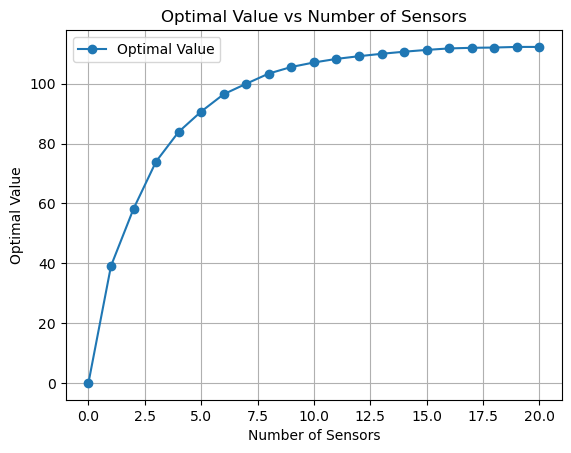

In [13]:
# Plotting
plt.plot([len(nodes[k]) for k in nodes.keys()], obj_vals, label='Optimal Value', marker='o', linestyle='-')
plt.title('Optimal Value vs Number of Sensors')
plt.xlabel('Number of Sensors')
plt.ylabel('Optimal Value')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
w = pd.read_csv("Criticality.csv", header=None)
w = w[0].values
w

array([0.12, 0.41, 0.02, ..., 0.74, 0.94, 0.97])

In [15]:
obj_vals = []
nodes = {}
for b in range(21):
    prob = LpProblem("NetworkMonitor", LpMinimize)
    
    # Decision Variable
    sv = LpVariable.dicts("s", V, 0, cat='Binary')
    y = LpVariable.dicts("y", [e for e in range(E)], 0, cat='Binary')
    z = LpVariable("z", lowBound = 0, cat='Continuous')

    # Objective Value
    prob += z
    
    # Constraints
    prob += lpSum([sv[v] for v in V]) <= b
    for e in range(E):
        prob += z >= (1-y[e])*w[e]
        prob +=  lpSum([f.iloc[e,v]*sv[v] for v in V]) >= y[e]
    
    prob.solve(GUROBI_CMD(path=path_to_Gurobi,options=[("MIPGap", 0)]))
    
    sensors = []
    for v in V:
        if sv[v].varValue == 1:
            sensors.append(v)
    nodes[b] = sensors
    obj_vals.append(prob.objective.value())
    print(prob.objective.value())

Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2024-11-12
Using license file /Users/dipendra/gurobi.lic

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])
Copyright (c) 2023, Gurobi Optimization, LLC

Read LP format model from file /var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/a8eb6249901e43a1b5c95fe47f6bd0f4-pulp.lp
Reading time = 0.05 seconds
OBJ: 2247 rows, 1935 columns, 137162 nonzeros

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2247 rows, 1935 columns and 137162 nonzeros
Model fingerprint: 0xeec49f2f
Variable types: 1 continuous, 1934 integer (1934 binary)
Coefficient statistics:
  Matrix range     [1e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-02, 1e+00]
Found heuristic solution: objective 1.0000000
Presolve removed 2247

0.9899999999999999
Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2024-11-12
Using license file /Users/dipendra/gurobi.lic

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])
Copyright (c) 2023, Gurobi Optimization, LLC

Read LP format model from file /var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/9fcaa0fa26a044939f855a534c0b52cf-pulp.lp
Reading time = 0.04 seconds
OBJ: 2247 rows, 1935 columns, 137162 nonzeros

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2247 rows, 1935 columns and 137162 nonzeros
Model fingerprint: 0x48de8647
Variable types: 1 continuous, 1934 integer (1934 binary)
Coefficient statistics:
  Matrix range     [1e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-02, 5e+00]
Found heuristic solution: objective 1.0000000
Pr

     0     0    0.73114    0  156    0.98000    0.73114  25.4%     -    0s
H    0     0                       0.9700000    0.73114  24.6%     -    0s
     0     0    0.80322    0   60    0.97000    0.80322  17.2%     -    0s
H    0     0                       0.9600000    0.80322  16.3%     -    0s
*    0     0               0       0.9500000    0.95000  0.00%     -    0s

Cutting planes:
  Gomory: 4
  Zero half: 6
  RLT: 16
  Relax-and-lift: 15

Explored 1 nodes (5150 simplex iterations) in 0.60 seconds (0.99 work units)
Thread count was 8 (of 8 available processors)

Solution count 6: 0.95 0.96 0.97 ... 1

Optimal solution found (tolerance 0.00e+00)
Best objective 9.500000000000e-01, best bound 9.500000000000e-01, gap 0.0000%

Wrote result file '/var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/63b0cd5b6acd4d469e75c55189c71ddd-pulp.sol'

0.9499999999999998
Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-comm

H    0     0                       0.8200000    0.76882  6.24%     -    0s
     0     0     cutoff    0         0.82000    0.82000  0.00%     -    0s

Cutting planes:
  Gomory: 2
  MIR: 6
  Zero half: 4
  RLT: 6
  Relax-and-lift: 1

Explored 1 nodes (6807 simplex iterations) in 0.86 seconds (1.32 work units)
Thread count was 8 (of 8 available processors)

Solution count 7: 0.82 0.84 0.93 ... 1

Optimal solution found (tolerance 0.00e+00)
Best objective 8.200000000000e-01, best bound 8.200000000000e-01, gap 0.0000%

Wrote result file '/var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/8824e22f9dc54d4f9634885784ff6b14-pulp.sol'

0.82
Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2024-11-12
Using license file /Users/dipendra/gurobi.lic

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])
Copyright (c) 2023, Gurobi Optimization, LLC

Read LP format model from file /var

     0     0    0.34815    0  184    0.95000    0.34815  63.4%     -    0s
H    0     0                       0.9300000    0.34815  62.6%     -    0s
H    0     0                       0.7800000    0.34815  55.4%     -    0s
     0     0 infeasible    0         0.78000    0.78000  0.00%     -    0s

Cutting planes:
  Gomory: 8
  RLT: 11
  Relax-and-lift: 118

Explored 1 nodes (2785 simplex iterations) in 0.46 seconds (0.71 work units)
Thread count was 8 (of 8 available processors)

Solution count 5: 0.78 0.93 0.95 ... 1

Optimal solution found (tolerance 0.00e+00)
Best objective 7.800000000000e-01, best bound 7.800000000000e-01, gap 0.0000%

Wrote result file '/var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/3e1b46a4d9584e6785d24bb15c54b0a8-pulp.sol'

0.78
Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2024-11-12
Using license file /Users/dipendra/gurobi.lic

Gurobi Optimizer ve


Root relaxation: objective 1.641099e-02, 1309 iterations, 0.02 seconds (0.06 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.01641    0  195    1.00000    0.01641  98.4%     -    0s
H    0     0                       0.9300000    0.01641  98.2%     -    0s
H    0     0                       0.8300000    0.01641  98.0%     -    0s
H    0     0                       0.1200000    0.01641  86.3%     -    0s
     0     0     cutoff    0         0.12000    0.12000  0.00%     -    0s

Cutting planes:
  Zero half: 1
  RLT: 11

Explored 1 nodes (2046 simplex iterations) in 0.31 seconds (0.63 work units)
Thread count was 8 (of 8 available processors)

Solution count 4: 0.12 0.83 0.93 1 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.200000000000e-01, best bound 1.200000000000e-01, gap 0.0000%

Wrote result file '/var/folders/nm/vy6jh_gd4fv2xcmvqc69

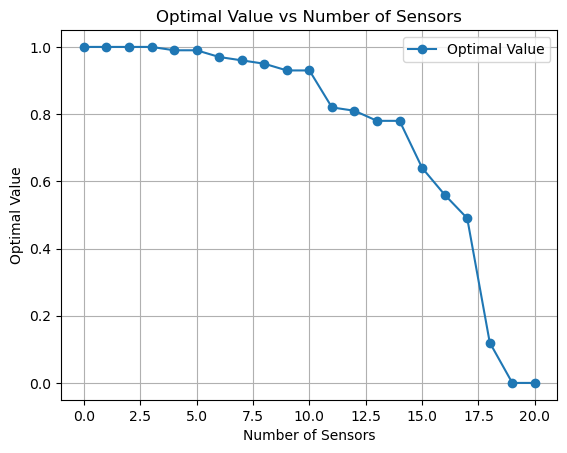

In [16]:
# Plotting
plt.plot([len(nodes[k]) for k in nodes.keys()], obj_vals, label='Optimal Value', marker='o', linestyle='-')
plt.title('Optimal Value vs Number of Sensors')
plt.xlabel('Number of Sensors')
plt.ylabel('Optimal Value')
plt.legend()
plt.grid(True)
plt.show()